In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [2]:
# Prepare a preediction model for profit of 50_startups data
Data =pd.read_csv(r"C:\Users\Mou\Desktop\finity\New folder\multi linear regression\50_Startups.csv")

In [3]:
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
pwd

'C:\\Users\\Mou'

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#Check for the missing values
Data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
sweet_report = sv.analyze(Data)
sweet_report.show_html('weather_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report weather_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Correlation Matrix

In [11]:
Data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

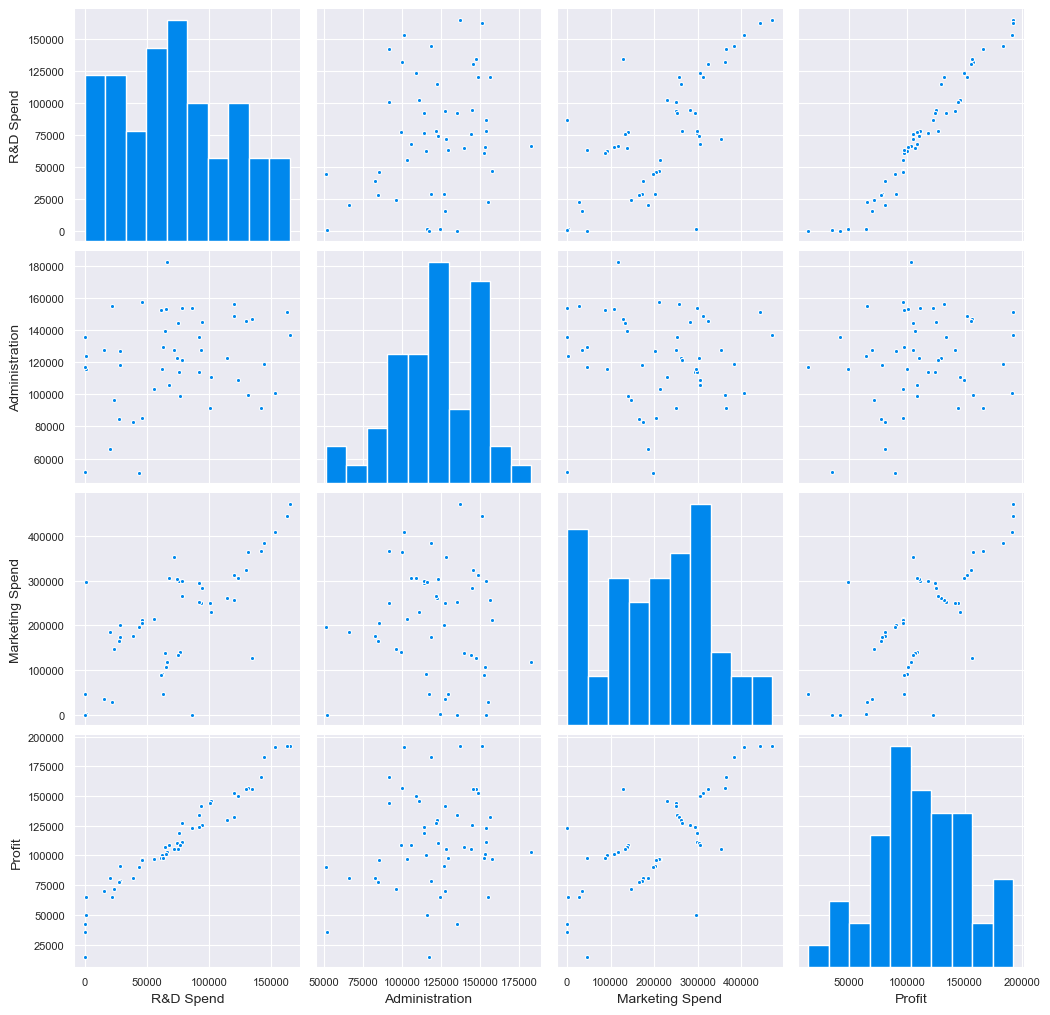

In [12]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Data)

In [20]:
Data =Data.rename({'R&D Spend':'RND_Spend','Marketing Spend':'Marketing_Spend'},axis = 1)


In [21]:
Data.head()

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Preparing a model

In [22]:
import statsmodels.formula.api as smf 

In [24]:
#Build model
model = smf.ols('Profit~RND_Spend+Administration+Marketing_Spend',data=Data).fit()

In [25]:
#Coefficients
model.params

Intercept          50122.192990
RND_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [26]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RND_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RND_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [27]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [28]:
#'Profit~RND_Spend+Administration+Marketing_Spend'
ml_R=smf.ols('Profit~RND_Spend',data = Data).fit()  
#t and p-Values
print(ml_R.tvalues, '\n', ml_R.pvalues)  

Intercept    19.320288
RND_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
RND_Spend    3.500322e-32
dtype: float64


In [29]:
ml_A=smf.ols('Profit~Administration',data = Data).fit()  
print(ml_A.tvalues, '\n', ml_A.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [30]:
ml_M=smf.ols('Profit~Marketing_Spend',data = Data).fit()  
print(ml_M.tvalues, '\n', ml_M.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [31]:
Data.corr()

,RND_Spend,Administration,Marketing_Spend,Profit
RND_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

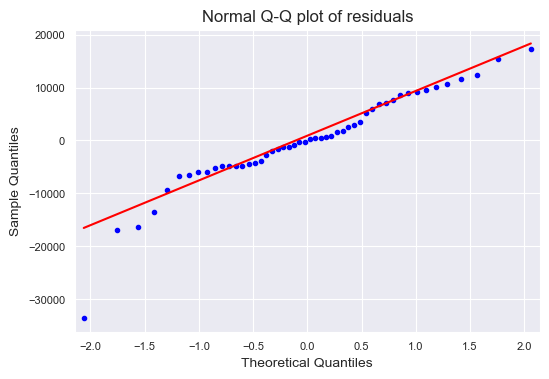

In [32]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [34]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

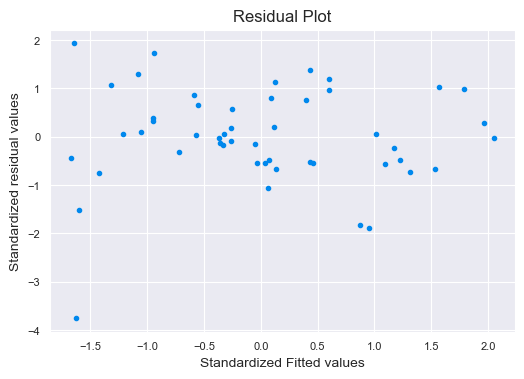

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

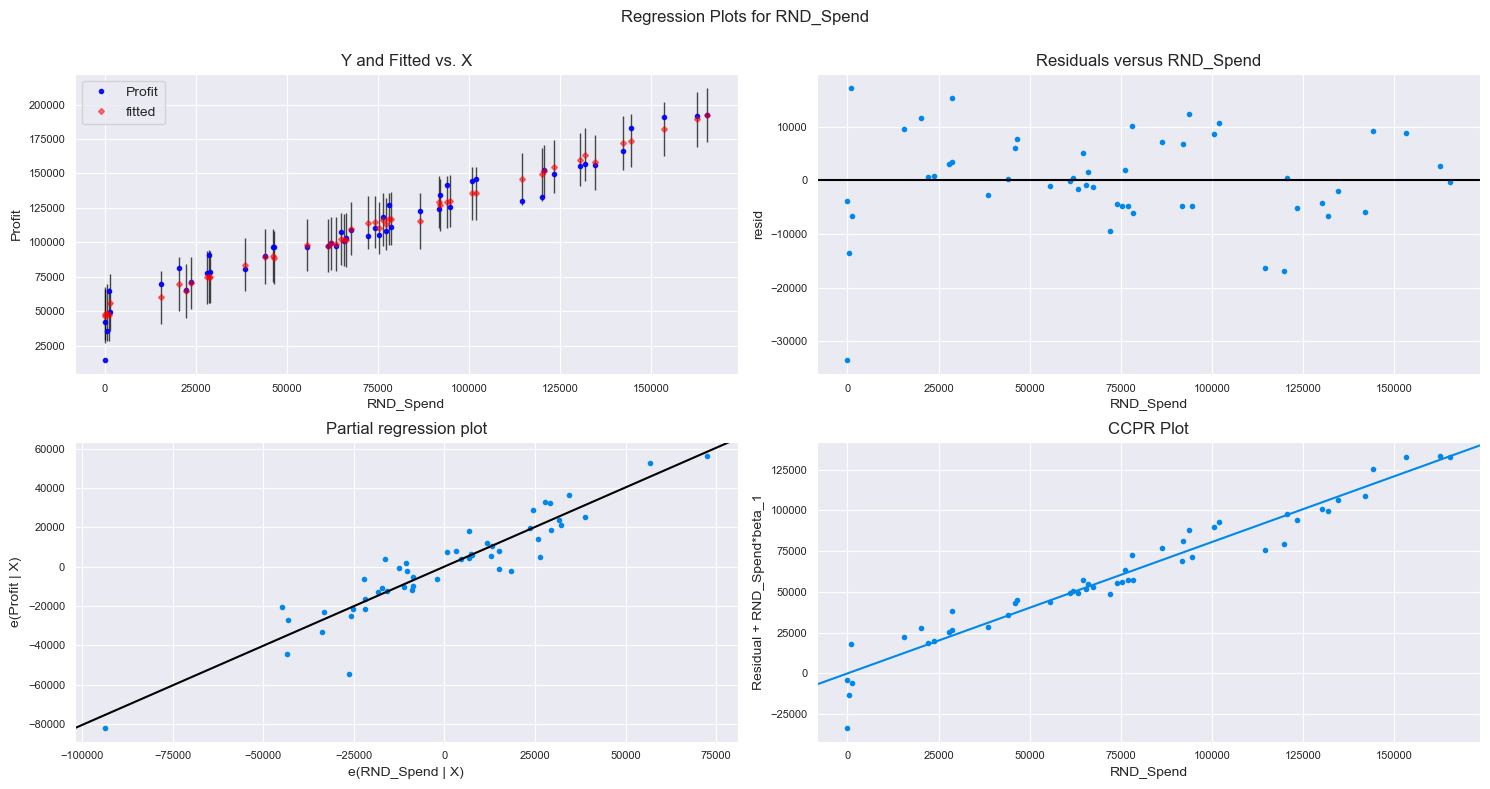

In [36]:
#'Profit~RND_Spend+Administration+Marketing_Spend'
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RND_Spend", fig=fig)
plt.show()

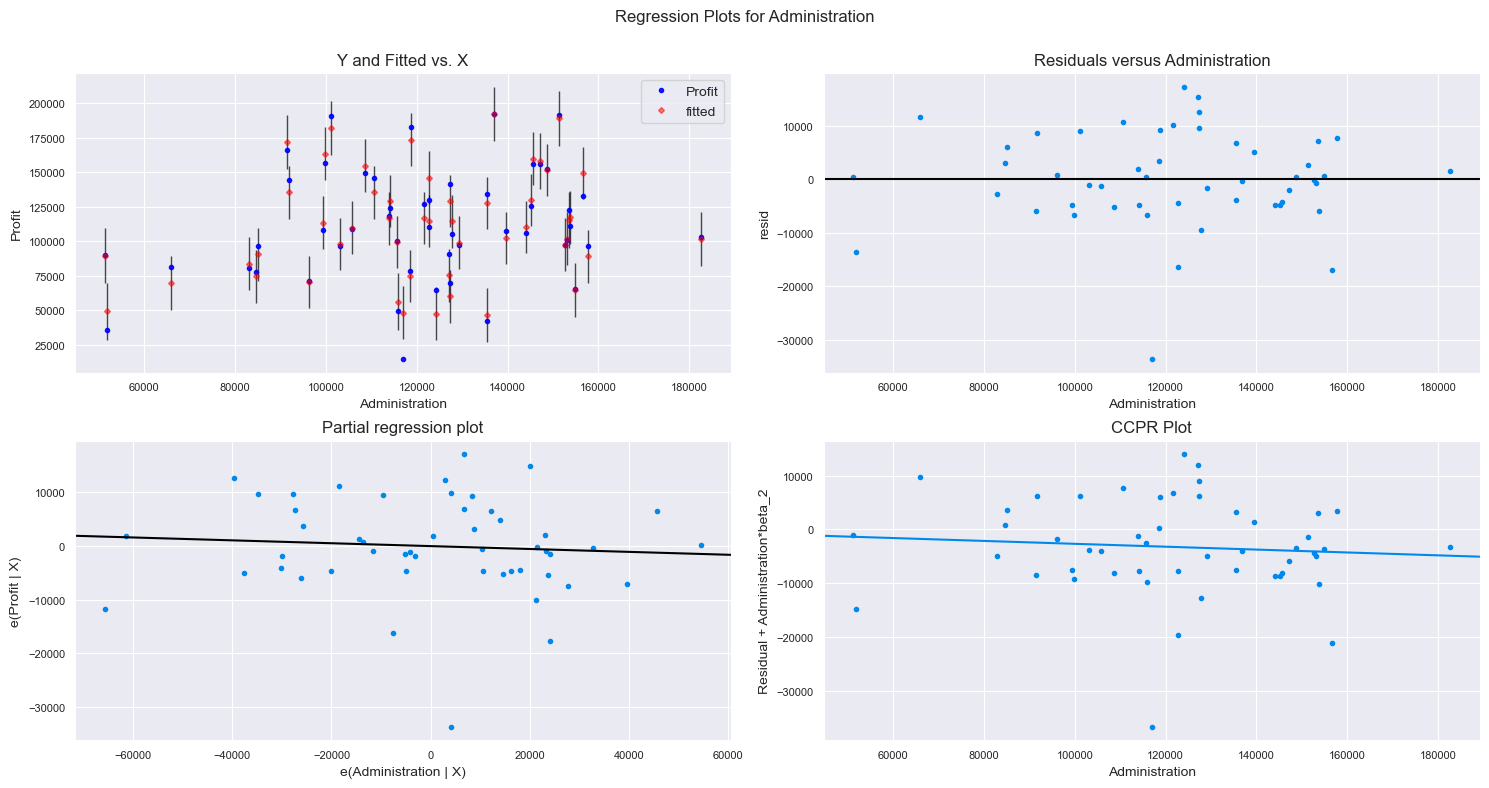

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

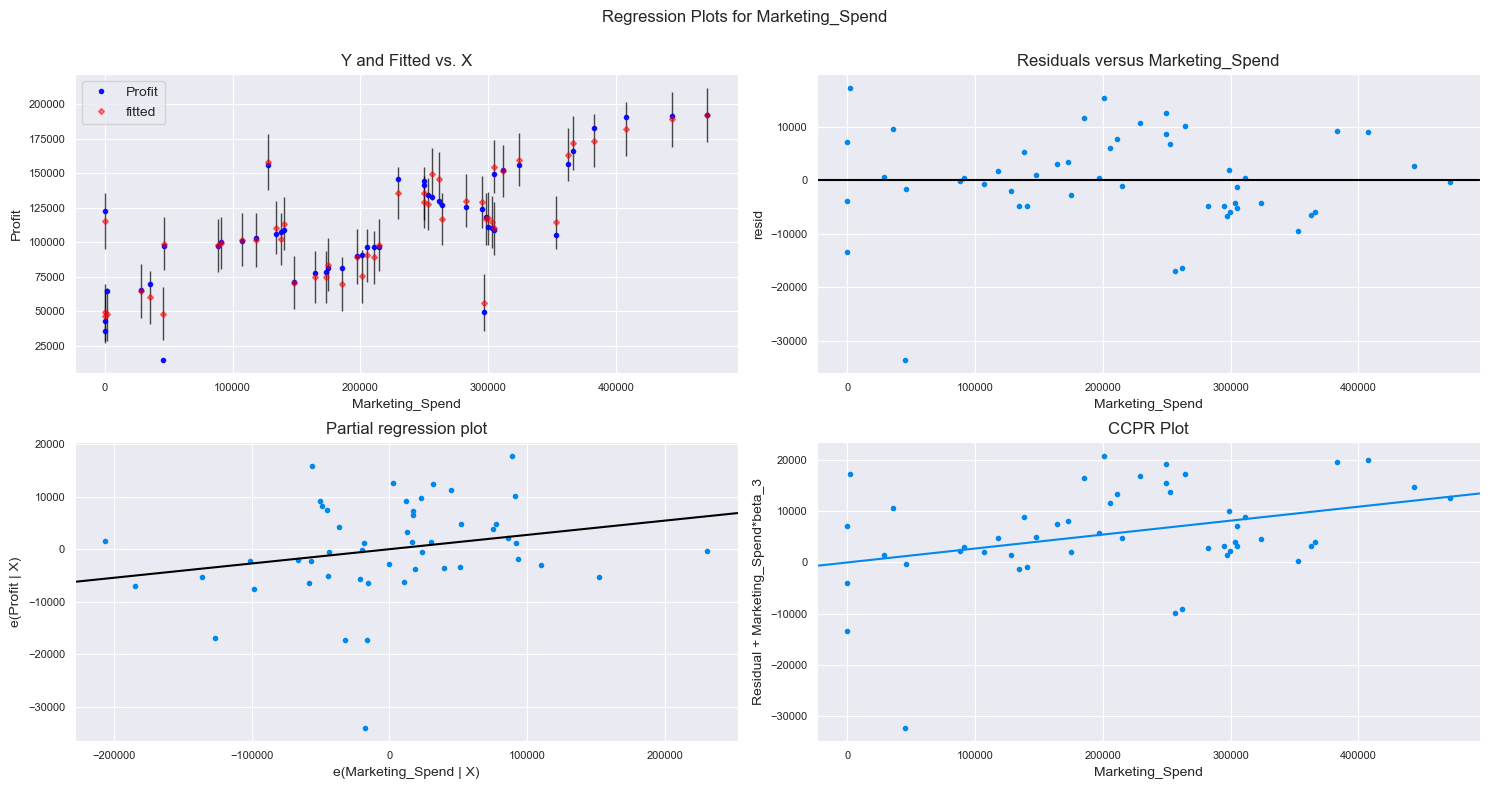

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [39]:
model_influence = model.get_influence()
(c,_ ) = model_influence.cooks_distance

In [40]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-42-e6e59370f2b0>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Data)), np.round(c, 3))


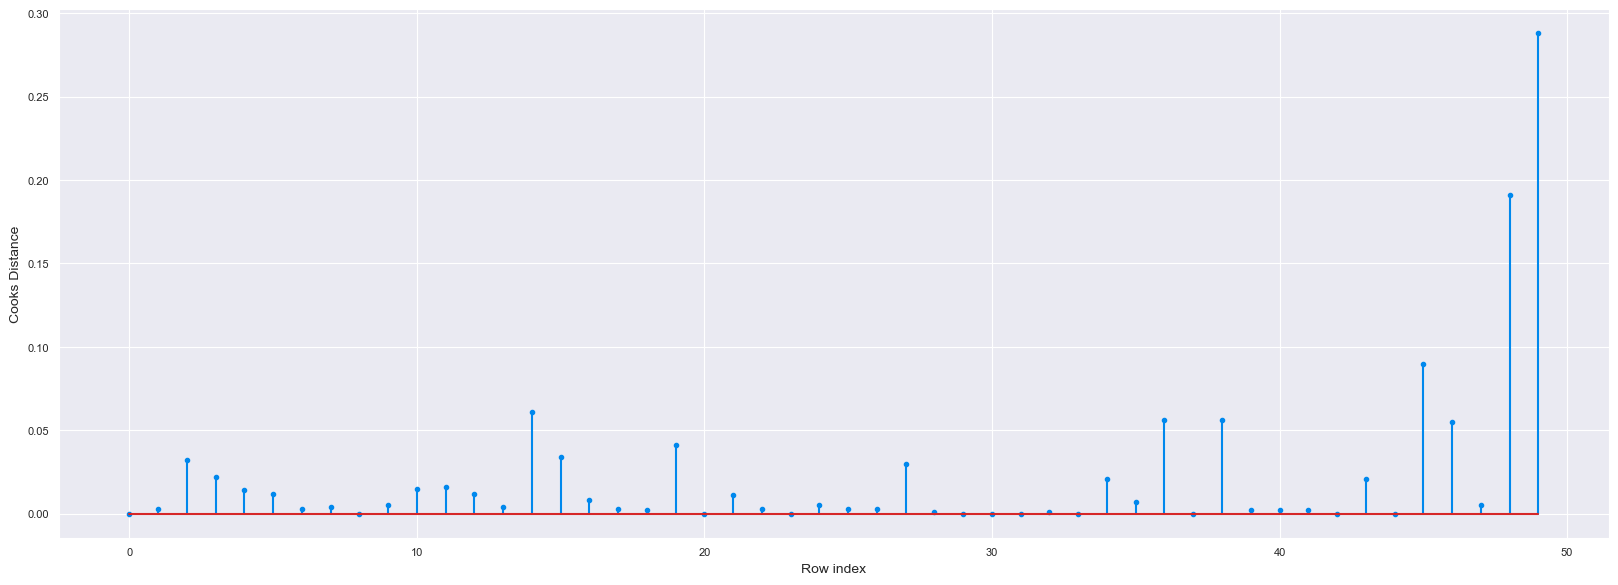

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

# High Influence points

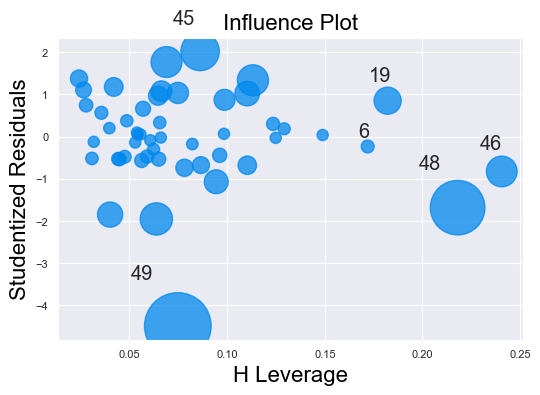

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
k = Data.shape[1]
n = Data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [47]:
leverage_cutoff

0.36

From the above plot, it is evident that data point 70 and 76 are the influencers

In [48]:
Data[Data.index.isin([49])]

,RND_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [49]:
#See the differences in HP and other variable values
Data.head()

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [50]:
#Load the data
Data_new = pd.read_csv(r"C:\Users\Mou\Desktop\finity\New folder\multi linear regression\50_Startups.csv")

In [51]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Data_new1=Data_new.drop(Data_new.index[[49]],axis=0).reset_index()

In [52]:
Data_new1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [53]:
#Drop the original index
Data_new1=Data_new1.drop(['index'],axis=1)

In [54]:
Data_new1 =Data_new1.rename({'R&D Spend':'RND_Spend','Marketing Spend':'Marketing_Spend'},axis = 1)

In [55]:
Data_new1.head()

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Build Model

In [56]:
#'Profit~RND_Spend+Administration+Marketing_Spend'
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RND_Spend+Administration+Marketing_Spend',data = Data_new1).fit()

In [57]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9613162435129847, 1020.5652974526367)

Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [58]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-60-f93500076e5f>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Data_new1)),np.round(c_V,3));


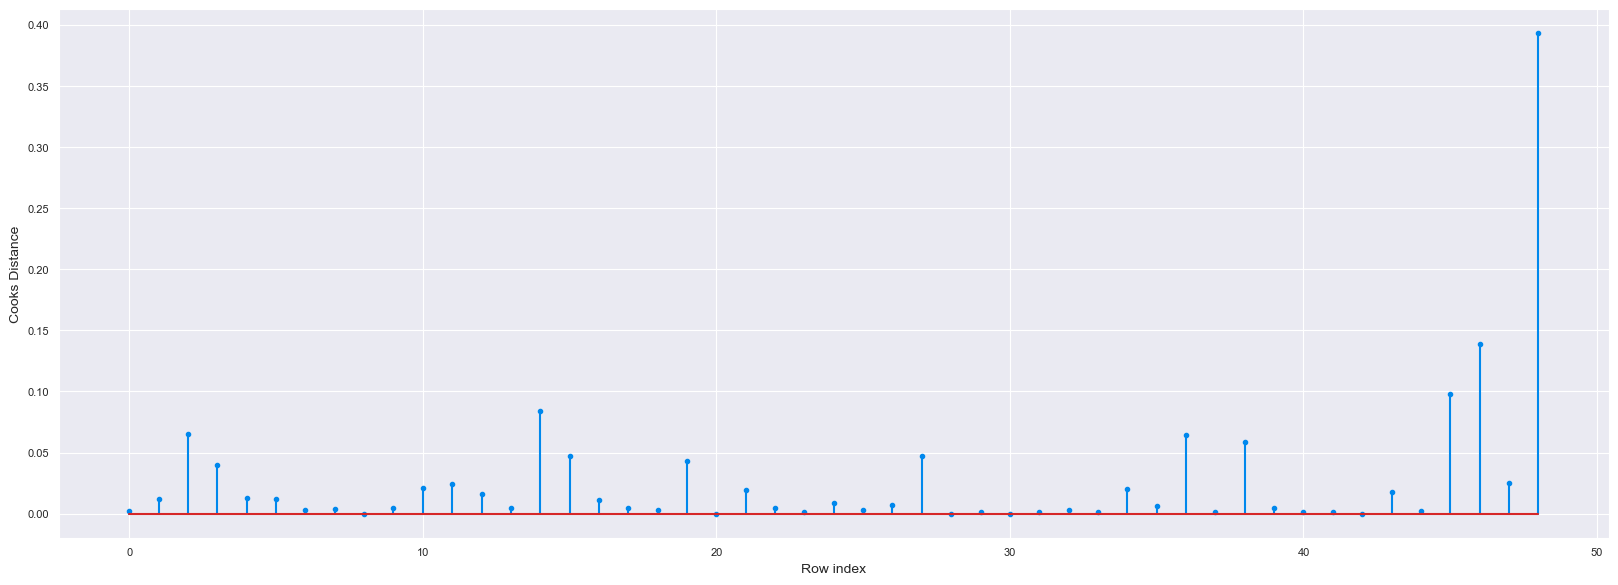

In [60]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data_new1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [61]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321127)

In [62]:
#Drop 76 and 77 observations
Data_new1=Data_new1.drop(Data_new1.index[[48]],axis=0)

In [63]:
Data_new1

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [64]:
#Reset the index and re arrange the row values
#car3=car2.reset_index()
#car4=car3.drop(['index'],axis=1)
#car4
#Build the model on the new data
final_ml_V= smf.ols('Profit~RND_Spend+Administration+Marketing_Spend',data = Data_new1).fit()

In [66]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-67-f93500076e5f>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Data_new1)),np.round(c_V,3));


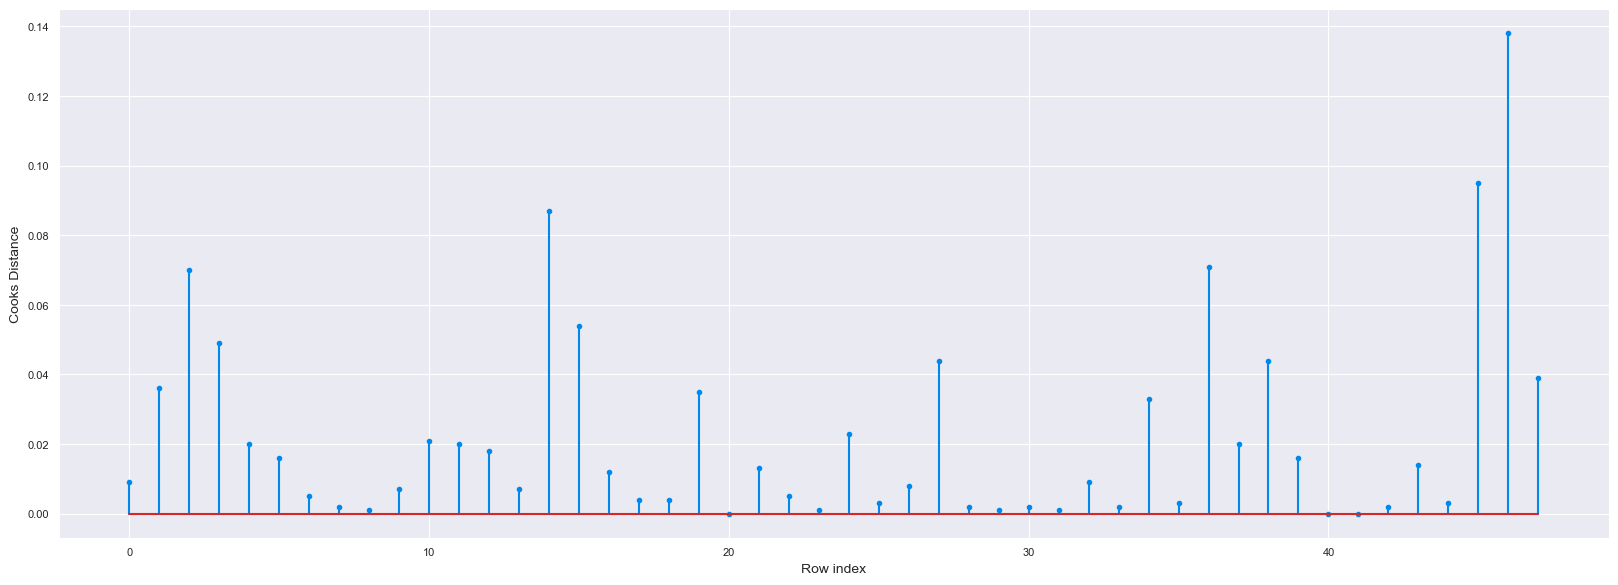

In [67]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Data_new1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [68]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(46, 0.13829133994334503)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [69]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Profit~RND_Spend+Administration+Marketing_Spend',data = Data_new1).fit()

In [70]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9626766170294073, 994.6690439260116)

In [71]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           2.03e-31
Time:                        20:55:38   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RND_Spend           0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting for new data

In [72]:
#New data for prediction
New_data=pd.DataFrame({'RND_Spend':40,"Administration":95,"Marketing_Spend":102},index=[1])

In [73]:
New_data

,RND_Spend,Administration,Marketing_Spend
1,40,95,102


In [74]:
final_ml_V.predict(New_data)

1    59125.778262
dtype: float64

In [75]:
pred_y = final_ml_V.predict(Data_new1)

In [76]:
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64